In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
J1939 = pd.read_csv('data/J1939Faults.csv')

C:\Users\DP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [128]:
J1939.shape

(1187335, 20)

In [129]:
codes = pd.read_excel('data/Service Fault Codes_1_0_0_167.xlsx')

In [130]:
codes.shape

(7124, 14)

In [3]:
vehicle = pd.read_csv('data/VehicleDiagnosticOnboardData.csv')

In [132]:
vehicle.shape

(12821626, 4)

In [133]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12821626 entries, 0 to 12821625
Data columns (total 4 columns):
Id         int64
Name       object
Value      object
FaultId    int64
dtypes: int64(2), object(2)
memory usage: 391.3+ MB


In [10]:
vehicle.head(20)

,Id,Name,Value,FaultId
0,1,IgnStatus,False,1
1,2,EngineOilPressure,0,1
2,3,EngineOilTemperature,96.74375,1
3,4,TurboBoostPressure,0,1
4,5,EngineLoad,11,1
5,6,AcceleratorPedal,0,1
6,7,IntakeManifoldTemperature,78.8,1
7,8,FuelRate,0,1
8,9,FuelLtd,12300.907429328,1
9,10,EngineRpm,0,1


In [219]:
J1939.eventDescription.isnull().sum().sum()

29883

In [220]:
J1939.eventDescription.value_counts()

Low (Severity Low) Engine Coolant Level                                                      153666
Abnormal Update Rate Tire Location                                                           115600
High Voltage (Fuel Level)                                                                     41519
High Voltage (Left Fuel Level Sensor)                                                         40645
Low (Severity Medium) Engine Coolant Level                                                    18107
Incorrect Data J1939 Network #1 Primary Vehicle Network ( previously SAE J1939 Data Link)     14886
Condition Exists Cruise Control Enable Switch                                                 11488
High (Severity Low) Water In Fuel Indicator                                                    8120
Condition Exists Engine Protection Torque Derate                                               5171
High Voltage (Water In Fuel Indicator)                                                         4109


In [224]:
J1939.head()

,RecordID,EventTimeStamp,eventDescription,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,Lat_Round,Long_Round,6hr_prior,Target
0,1,2015-02-21 10:47:13,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1439,38.857638,-84.626851,38.858,-84.627,2015-02-21 04:47:13,0
1,2,2015-02-21 11:34:34,0,unknown,11,629,12,True,127,1439,38.857638,-84.626851,38.858,-84.627,2015-02-21 05:34:34,0
3,4,2015-02-21 11:35:33,Incorrect Data Steering Wheel Angle,unknown,11,1807,2,True,127,1369,41.421018,-87.767361,41.421,-87.767,2015-02-21 05:35:33,0
5,6,2015-02-21 11:40:22,Low (Severity Low) Engine Coolant Level,CMMNS,0,111,17,True,1,1417,33.043564,-96.179722,33.044,-96.180,2015-02-21 05:40:22,0
6,7,2015-02-21 11:40:52,Low (Severity Low) Engine Coolant Level,unknown,0,111,17,True,2,1597,36.902916,-86.436481,36.903,-86.436,2015-02-21 05:40:52,0


In [222]:
J1939.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548192 entries, 0 to 1187333
Data columns (total 15 columns):
RecordID                 548192 non-null int64
EventTimeStamp           548192 non-null datetime64[ns]
eventDescription         548192 non-null object
ecuMake                  548192 non-null object
ecuSource                548192 non-null int64
spn                      548192 non-null int64
fmi                      548192 non-null int64
active                   548192 non-null bool
activeTransitionCount    548192 non-null int64
EquipmentID              548192 non-null object
Latitude                 548192 non-null float64
Longitude                548192 non-null float64
Lat_Round                548192 non-null float64
Long_Round               548192 non-null float64
6hr_prior                548192 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(4), int64(5), object(3)
memory usage: 63.3+ MB


In [4]:
J1939['Lat_Round'] = J1939.Latitude.round(3)
J1939['Long_Round'] = J1939.Longitude.round(3)
J1939 = J1939[~J1939.Lat_Round.isin([36.066, 36.067, 35.588, 35.589, 36.195, 36.196])]
J1939 = J1939[~J1939.Long_Round.isin([-86.434, -86.435, -86.443, -86.444, -83.174, -83.175])]

In [5]:
J1939.drop(["ecuSoftwareVersion", "actionDescription", "ecuModel", "faultValue", "ESS_Id", "MCTNumber", "LocationTimeStamp", "ecuSerialNumber", "Lat_Round", "Long_Round"], axis = 1, inplace = True)

In [6]:
J1939 = J1939[J1939['active'] == True]

In [7]:
J1939['EventTimeStamp'] = pd.to_datetime(J1939['EventTimeStamp'])

In [9]:
J1939.ecuMake.value_counts()

CMMNS      200605
unknown    147096
PACCR      133995
BNDWS       29384
EATON        5617
VOLVO        3354
5516014         1
Name: ecuMake, dtype: int64

In [8]:
def make(engine):
    if engine["ecuMake"] == "?MMNS" or engine["ecuMake"] == "??MNS":
        return 'CMMNS'
    elif engine["ecuMake"] == "?ATON":
        return "EATON"
    elif engine["ecuMake"] == "?NDWS":
        return "BNDWS"
    elif engine["ecuMake"] == "?ACCR" or engine["ecuMake"] == "???CR" or engine["ecuMake"] == "?CAR" or engine["ecuMake"] == "PCAR" or engine["ecuMake"] == "????R":
        return "PACCR"
    elif engine["ecuMake"] == "?????" or engine["ecuMake"] == "????S" or engine["ecuMake"] == "?????MX16U13D13" or engine["ecuMake"] == "?????MX" or engine["ecuMake"] == "?????MX":
        return "unknown"
    else:
        return engine['ecuMake']

J1939['ecuMake'] = J1939.apply(make, axis = 1)

In [10]:
J1939['ecuMake'].fillna('unknown', inplace=True)

In [11]:
J1939['eventDescription'].fillna(0, inplace=True)

In [12]:
J1939['6hr_prior'] = J1939['EventTimeStamp'] - timedelta(hours = 6)

In [13]:
failure_error_2 = J1939.spn.isin([5246])
failure_error = J1939.spn.isin([1569]) & J1939.fmi.isin([31])
all_failures = failure_error_2 | failure_error
failed_trucks = J1939[all_failures]


In [14]:
#failed_truck_df['Target'] = 0
J1939['Target'] = 0

In [15]:
J1939.eventDescription.value_counts()

Low (Severity Low) Engine Coolant Level                                                      153666
Abnormal Update Rate Tire Location                                                           115600
High Voltage (Fuel Level)                                                                     41519
High Voltage (Left Fuel Level Sensor)                                                         40645
0                                                                                             29883
Low (Severity Medium) Engine Coolant Level                                                    18107
Incorrect Data J1939 Network #1 Primary Vehicle Network ( previously SAE J1939 Data Link)     14886
Condition Exists Cruise Control Enable Switch                                                 11488
High (Severity Low) Water In Fuel Indicator                                                    8120
Condition Exists Engine Protection Torque Derate                                               5171


In [227]:
for idx, row in J1939.iterrows(): 
    failed_trucks.loc[(failed_trucks['EventTimeStamp'] > row['6hr_prior']) &
    (failed_trucks['EventTimeStamp'] < row['EventTimeStamp']) &
    (failed_trucks['EquipmentID'] == row['EquipmentID']), 'Target'] = 1

KeyboardInterrupt: 

In [94]:
#J1939[J1939.spn.isin([5246])]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,target
45,46,990931,2015-02-21 12:10:51.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,0,True,1,NaN,1395,105349612,36.065972,-86.433425,2015-02-21 12:11:27.000,1.0
1918,1919,1007751,2015-02-22 19:44:55.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,0,True,1,NaN,1395,105349612,36.066203,-86.434814,2015-02-22 19:46:27.000,1.0
2058,2059,1010486,2015-02-23 04:00:21.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,0,False,1,NaN,1395,105349612,36.066666,-86.434537,2015-02-23 01:06:06.000,1.0
2089,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,...,0,True,1,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,1.0
2971,2972,1026305,2015-02-23 15:54:22.000,NaN,NaN,unknown,unknown,unknown,unknown,0,...,0,True,1,NaN,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000,1.0
5713,5714,1070646,2015-02-25 13:53:08.000,NaN,NaN,unknown,unknown,unknown,unknown,0,...,0,True,1,NaN,1329,105400037,39.399583,-82.974768,2015-02-25 13:56:31.000,1.0
5809,5810,1071907,2015-02-25 14:47:00.000,NaN,NaN,unknown,unknown,unknown,unknown,0,...,0,False,1,NaN,1329,105400037,39.399629,-82.974814,2015-02-25 14:46:56.000,1.0
6534,6535,1097942,2015-02-26 22:24:29.000,NaN,NaN,04993120*00021657*082113134117*07700053*I0*BBZ*,79466573,6X1u10D1500000000,CMMNS,0,...,0,True,1,NaN,1419,105355995,37.596805,-85.865555,2015-02-26 22:25:05.000,1.0
6552,6553,1098750,2015-02-27 01:30:23.000,NaN,NaN,04993120*00021657*082113134117*07700053*I0*BBZ*,79466573,6X1u10D1500000000,CMMNS,0,...,0,False,1,NaN,1419,105355995,37.596851,-85.865601,2015-02-27 01:30:18.000,1.0
6628,6629,1104361,2015-02-27 09:09:56.000,NaN,NaN,04993120*00054166*082113134117*07700053*I0*BBZ*,79487658,6X1u10D1500000000,CMMNS,0,...,0,True,1,NaN,1486,105338831,40.534259,-76.431805,2015-02-27 09:10:33.000,1.0


In [51]:
#codes[codes.SPN.isin([5246])]

,Published in CES 14602,Cummins Fault Code,Revision,PID,SID,MID,J1587 FMI,SPN,J1939 FMI,J2012 Pcode,Lamp Color,Lamp Device,Cummins Description,Algorithm Description
2518,Y,3712,167,Not Mapped,Not Mapped,Not Mapped,0,5246,0,Not Mapped,Red,Stop / Shutdown,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement of 5 mph derate - Fault Code 41...
2781,Y,4134,167,Not Mapped,Not Mapped,Not Mapped,0,5246,15,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement - Data ...,SCR inducement - Least Severe - Fault Code 371...
4338,Y,6254,167,Not Mapped,Not Mapped,Not Mapped,0,5246,16,Not Mapped,Amber,Warning,Aftertreatment SCR Operator Inducement Severit...,NaN


In [9]:
faults_onboard = pd.merge(J1939, vehicle, left_on='RecordID', right_on='FaultId', how='left')
#faults_onboard

In [12]:
faults_onboard[faults_onboard.spn.isin([5246])]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
418,46,990931,2015-02-21 12:10:51.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,1395,105349612,36.065972,-86.433425,2015-02-21 12:11:27.000,419,IgnStatus,True,46
419,46,990931,2015-02-21 12:10:51.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,1395,105349612,36.065972,-86.433425,2015-02-21 12:11:27.000,420,LampStatus,22527,46
16232,1919,1007751,2015-02-22 19:44:55.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,1395,105349612,36.066203,-86.434814,2015-02-22 19:46:27.000,16233,IgnStatus,True,1919
16233,1919,1007751,2015-02-22 19:44:55.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,1395,105349612,36.066203,-86.434814,2015-02-22 19:46:27.000,16234,LampStatus,22527,1919
17486,2059,1010486,2015-02-23 04:00:21.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,1395,105349612,36.066666,-86.434537,2015-02-23 01:06:06.000,17487,LampStatus,1023,2059
17735,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,...,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,17736,IgnStatus,False,2090
17736,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,...,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,17737,FuelLtd,33470.466902374,2090
17737,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,...,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,17738,EngineTimeLtd,4645.45,2090
17738,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,...,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,17739,LampStatus,22527,2090
25573,2972,1026305,2015-02-23 15:54:22.000,NaN,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000,25574,IgnStatus,True,2972


In [13]:
faults_onboard.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,1,IgnStatus,False,1
1,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,2,EngineOilPressure,0,1
2,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,3,EngineOilTemperature,96.74375,1
3,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,4,TurboBoostPressure,0,1
4,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,5,EngineLoad,11,1


In [14]:
failure_error_2 = faults_onboard.spn.isin([5246])
failure_error_2.head()

0    False
1    False
2    False
3    False
4    False
Name: spn, dtype: bool

In [15]:
failure_error = faults_onboard.spn.isin([1569]) & faults_onboard.fmi.isin([31])
failure_error.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [52]:
all_failures = failure_error_2 | failure_error
all_failures.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [90]:
failed_trucks = faults_onboard[all_failures].EquipmentID.astype(int).unique()
failed_trucks

array([     1721,      1395,      1515,      1630,      1487,      1499,
            1329,      1365,      1419,      1486,      1509,      1492,
            1340,      1328,      1430,      1370,      1497,      1350,
            1473,      1608,      1606,      1612,      1354,      1493,
            1583,      1465,      1335,      1789,      1383,      1389,
            1501,      1438,      1463,      1514,      1666,      1689,
            1692,      1357,      1396,       310,      1602,      1660,
            1445,      1431, 105393153,      1327,      1795,      1399,
            1494,      1367,      1364,      1452,      1595,      1740,
            1366,      1339,      1425,      1358,      1646,      1391,
            1428,      1338,      1637,      1346,      1490,      1562,
            1433,      1663,      1417,      1424,      1771,      1790,
            1591,      1797,      1596,      1421,      1547,      1444,
            1480,      1466,      1457, 105360462, 

In [95]:
failed_truck_df = faults_onboard[faults_onboard.EquipmentID.isin(failed_trucks)]

In [96]:
failed_truck_df.drop(["ecuSoftwareVersion", "actionDescription", "ecuModel", "ecuMake", "faultValue"], axis=1, inplace = True)

C:\Users\DP\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [98]:
failed_truck_df[failed_truck_df.spn.isin([5246])]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
356931,35552,2110943,2015-04-27 12:45:01.000,NaN,79463007,0,5246,0,True,1,1383,105349650,39.603101,-75.990694,2015-04-27 12:46:20.000,358174,IgnStatus,True,35552
356932,35552,2110943,2015-04-27 12:45:01.000,NaN,79463007,0,5246,0,True,1,1383,105349650,39.603101,-75.990694,2015-04-27 12:46:20.000,358175,LampStatus,22527,35552
357301,35603,2111708,2015-04-27 13:18:09.000,NaN,79463007,0,5246,0,False,1,1383,105349650,39.603055,-75.990694,2015-04-27 13:18:04.000,358544,LampStatus,17407,35603
366499,36606,2131169,2015-04-28 11:30:47.000,NaN,79463007,0,5246,0,False,1,1383,105349650,39.639259,-75.807175,2015-04-28 11:30:42.000,367742,LampStatus,17407,36606
366501,36608,2131172,2015-04-28 11:29:24.000,NaN,79463007,0,5246,0,True,1,1383,105349650,39.639305,-75.807175,2015-04-28 11:31:11.000,367744,IgnStatus,True,36608
366502,36608,2131172,2015-04-28 11:29:24.000,NaN,79463007,0,5246,0,True,1,1383,105349650,39.639305,-75.807175,2015-04-28 11:31:11.000,367745,LampStatus,22527,36608
482379,48818,2353409,2015-05-11 04:00:32.000,NaN,79464671,0,5246,0,True,1,1396,105356020,38.155925,-88.911527,2015-05-11 04:01:08.000,483622,IgnStatus,True,48818
482380,48818,2353409,2015-05-11 04:00:32.000,NaN,79464671,0,5246,0,True,1,1396,105356020,38.155925,-88.911527,2015-05-11 04:01:08.000,483623,LampStatus,22527,48818
482464,48825,2353478,2015-05-11 04:12:15.000,NaN,79464671,0,5246,0,False,1,1396,105356020,38.155833,-88.909953,2015-05-11 04:12:10.000,483707,LampStatus,17407,48825
544732,56526,2471410,2015-05-17 09:17:11.000,NaN,79623055,0,5246,0,True,1,1602,105410896,36.194953,-83.174629,2015-05-17 09:37:48.000,546611,IgnStatus,True,56526


In [99]:
failed_truck_df = failed_truck_df.sort_values(["EquipmentID", "EventTimeStamp"], ascending = (False, True))
failed_truck_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
10426689,1003871,46958970,2018-04-26 07:25:14.000,Condition Exists Catalyst Dosing Unit Input Lines,79875551,0,3362,31,True,1,105427203,105427203,36.175694,-86.477592,2018-04-26 07:25:50.000,10448136,Throttle,100,1003871
10426690,1003871,46958970,2018-04-26 07:25:14.000,Condition Exists Catalyst Dosing Unit Input Lines,79875551,0,3362,31,True,1,105427203,105427203,36.175694,-86.477592,2018-04-26 07:25:50.000,10448137,IgnStatus,True,1003871
10426691,1003871,46958970,2018-04-26 07:25:14.000,Condition Exists Catalyst Dosing Unit Input Lines,79875551,0,3362,31,True,1,105427203,105427203,36.175694,-86.477592,2018-04-26 07:25:50.000,10448138,EngineOilPressure,39.44,1003871
10426692,1003871,46958970,2018-04-26 07:25:14.000,Condition Exists Catalyst Dosing Unit Input Lines,79875551,0,3362,31,True,1,105427203,105427203,36.175694,-86.477592,2018-04-26 07:25:50.000,10448139,EngineOilTemperature,206.5437,1003871
10426693,1003871,46958970,2018-04-26 07:25:14.000,Condition Exists Catalyst Dosing Unit Input Lines,79875551,0,3362,31,True,1,105427203,105427203,36.175694,-86.477592,2018-04-26 07:25:50.000,10448140,FuelTemperature,32,1003871
10426694,1003871,46958970,2018-04-26 07:25:14.000,Condition Exists Catalyst Dosing Unit Input Lines,79875551,0,3362,31,True,1,105427203,105427203,36.175694,-86.477592,2018-04-26 07:25:50.000,10448141,TurboBoostPressure,11.89,1003871
10426695,1003871,46958970,2018-04-26 07:25:14.000,Condition Exists Catalyst Dosing Unit Input Lines,79875551,0,3362,31,True,1,105427203,105427203,36.175694,-86.477592,2018-04-26 07:25:50.000,10448142,EngineLoad,57,1003871
10426696,1003871,46958970,2018-04-26 07:25:14.000,Condition Exists Catalyst Dosing Unit Input Lines,79875551,0,3362,31,True,1,105427203,105427203,36.175694,-86.477592,2018-04-26 07:25:50.000,10448143,AcceleratorPedal,0,1003871
10426697,1003871,46958970,2018-04-26 07:25:14.000,Condition Exists Catalyst Dosing Unit Input Lines,79875551,0,3362,31,True,1,105427203,105427203,36.175694,-86.477592,2018-04-26 07:25:50.000,10448144,FuelRate,10.30274,1003871
10426698,1003871,46958970,2018-04-26 07:25:14.000,Condition Exists Catalyst Dosing Unit Input Lines,79875551,0,3362,31,True,1,105427203,105427203,36.175694,-86.477592,2018-04-26 07:25:50.000,10448145,IntakeManifoldTemperature,93.2,1003871


In [80]:
target_variable= failed_truck_df.loc[(failed_truck_df['spn'] == 5246) & (failed_truck_df['fmi'] == 0), 'derate'] = 1
target_variable

1

In [89]:
#truck_310[truck_310.spn.isin([5246])]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,...,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId,Year,Month


In [120]:
truck_310 = failed_truck_df[failed_truck_df.EquipmentID.isin([310])]
truck_310

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId
487727,49403,2362799,2015-05-11 12:52:51.000,Condition Exists Engine Protection Torque Derate,79756075,0,1569,31,True,126,310,105442984,35.264259,-86.398425,2015-05-11 12:55:27.000,488970,IgnStatus,False,49403
487728,49403,2362799,2015-05-11 12:52:51.000,Condition Exists Engine Protection Torque Derate,79756075,0,1569,31,True,126,310,105442984,35.264259,-86.398425,2015-05-11 12:55:27.000,488971,LampStatus,2047,49403
487729,49404,2362808,2015-05-11 12:56:19.000,Condition Exists Engine Protection Torque Derate,79756075,0,1569,31,False,126,310,105442984,35.264259,-86.398425,2015-05-11 12:56:14.000,488972,LampStatus,1023,49404
496759,50415,2382785,2015-05-12 11:34:48.000,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,310,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498002,Throttle,0,50415
496760,50415,2382785,2015-05-12 11:34:48.000,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,310,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498003,IgnStatus,True,50415
496761,50415,2382785,2015-05-12 11:34:48.000,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,310,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498004,EngineOilPressure,27.26,50415
496762,50415,2382785,2015-05-12 11:34:48.000,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,310,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498005,EngineOilTemperature,197.6,50415
496763,50415,2382785,2015-05-12 11:34:48.000,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,310,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498006,FuelTemperature,32,50415
496764,50415,2382785,2015-05-12 11:34:48.000,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,310,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498007,EngineLoad,17,50415
496765,50415,2382785,2015-05-12 11:34:48.000,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,310,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498008,TurboBoostPressure,0.29,50415


In [121]:
truck_310['EventTimeStamp'] = pd.to_datetime(truck_310['EventTimeStamp'])
truck_310['Year'] = pd.DatetimeIndex(truck_310['EventTimeStamp']).year
truck_310['Month'] = pd.DatetimeIndex(truck_310['EventTimeStamp']).month
truck_310

C:\Users\DP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\DP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,...,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId,Year,Month
487727,49403,2362799,2015-05-11 12:52:51,Condition Exists Engine Protection Torque Derate,79756075,0,1569,31,True,126,...,105442984,35.264259,-86.398425,2015-05-11 12:55:27.000,488970,IgnStatus,False,49403,2015,5
487728,49403,2362799,2015-05-11 12:52:51,Condition Exists Engine Protection Torque Derate,79756075,0,1569,31,True,126,...,105442984,35.264259,-86.398425,2015-05-11 12:55:27.000,488971,LampStatus,2047,49403,2015,5
487729,49404,2362808,2015-05-11 12:56:19,Condition Exists Engine Protection Torque Derate,79756075,0,1569,31,False,126,...,105442984,35.264259,-86.398425,2015-05-11 12:56:14.000,488972,LampStatus,1023,49404,2015,5
496759,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498002,Throttle,0,50415,2015,5
496760,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498003,IgnStatus,True,50415,2015,5
496761,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498004,EngineOilPressure,27.26,50415,2015,5
496762,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498005,EngineOilTemperature,197.6,50415,2015,5
496763,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498006,FuelTemperature,32,50415,2015,5
496764,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498007,EngineLoad,17,50415,2015,5
496765,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,105442984,35.262916,-86.396250,2015-05-12 11:35:24.000,498008,TurboBoostPressure,0.29,50415,2015,5


In [ ]:
truck_310

In [119]:
#truck_310['6hrs_prior'] = truck_310['EventTimeStamp'] - timedelta(hours = 6)
#truck_310

C:\Users\DP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,...,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId,Year,Month,6hrs_prior
487727,49403,2362799,2015-05-11 12:52:51,Condition Exists Engine Protection Torque Derate,79756075,0,1569,31,True,126,...,35.264259,-86.398425,2015-05-11 12:55:27.000,488970,IgnStatus,False,49403,2015,5,2015-05-11 06:52:51
487728,49403,2362799,2015-05-11 12:52:51,Condition Exists Engine Protection Torque Derate,79756075,0,1569,31,True,126,...,35.264259,-86.398425,2015-05-11 12:55:27.000,488971,LampStatus,2047,49403,2015,5,2015-05-11 06:52:51
487729,49404,2362808,2015-05-11 12:56:19,Condition Exists Engine Protection Torque Derate,79756075,0,1569,31,False,126,...,35.264259,-86.398425,2015-05-11 12:56:14.000,488972,LampStatus,1023,49404,2015,5,2015-05-11 06:56:19
496759,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,35.262916,-86.396250,2015-05-12 11:35:24.000,498002,Throttle,0,50415,2015,5,2015-05-12 05:34:48
496760,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,35.262916,-86.396250,2015-05-12 11:35:24.000,498003,IgnStatus,True,50415,2015,5,2015-05-12 05:34:48
496761,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,35.262916,-86.396250,2015-05-12 11:35:24.000,498004,EngineOilPressure,27.26,50415,2015,5,2015-05-12 05:34:48
496762,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,35.262916,-86.396250,2015-05-12 11:35:24.000,498005,EngineOilTemperature,197.6,50415,2015,5,2015-05-12 05:34:48
496763,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,35.262916,-86.396250,2015-05-12 11:35:24.000,498006,FuelTemperature,32,50415,2015,5,2015-05-12 05:34:48
496764,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,35.262916,-86.396250,2015-05-12 11:35:24.000,498007,EngineLoad,17,50415,2015,5,2015-05-12 05:34:48
496765,50415,2382785,2015-05-12 11:34:48,High (Severity Medium) J1939 Network #2,unknown,49,1231,16,True,4,...,35.262916,-86.396250,2015-05-12 11:35:24.000,498008,TurboBoostPressure,0.29,50415,2015,5,2015-05-12 05:34:48


In [70]:
truck_310_time= truck_310.between_time('0:45', '0:15')

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSerialNumber,ecuSource,spn,fmi,active,activeTransitionCount,...,MCTNumber,Latitude,Longitude,LocationTimeStamp,Id,Name,Value,FaultId,Year,Month
10545132,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568531,Throttle,100,1017355,2018,5
10545133,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568532,IgnStatus,True,1017355,2018,5
10545134,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568533,EngineOilPressure,17.98,1017355,2018,5
10545135,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568534,EngineOilTemperature,210.0313,1017355,2018,5
10545136,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568535,EngineLoad,14,1017355,2018,5
10545137,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568536,TurboBoostPressure,1.45,1017355,2018,5
10545138,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568537,AcceleratorPedal,0,1017355,2018,5
10545139,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568538,FuelLtd,36166.738951112,1017355,2018,5
10545140,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568539,FuelRate,0.6340149,1017355,2018,5
10545141,1017355,49984941,2018-05-24 18:50:32,Incorrect Data Wheel Sensor ABS Axle 1 Left,S211411637,11,789,2,True,127,...,105442984,35.587453,-86.443240,2018-05-24 18:51:08.000,10568540,IntakeManifoldTemperature,131,1017355,2018,5


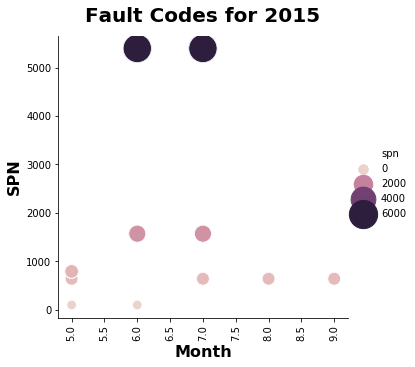

In [71]:
g= sns.relplot(x="Month", y="spn", hue="spn", size="spn", sizes=(90, 800), data=truck_310_2018)
g.set_xticklabels(rotation=90)
g.axes[0,0].set_xlabel('Month', size = 16, weight = 'bold')
g.axes[0,0].set_ylabel('SPN', size = 16, weight = 'bold')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Fault Codes for 2015", size = 20, weight = 'bold');

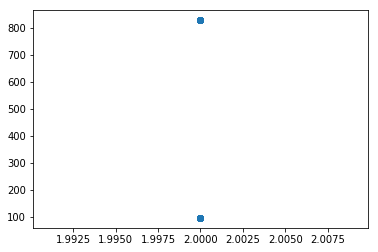

In [68]:
plt.scatter(x=truck_310_2015['Month'], y=truck_310_2015['spn'])
plt.show()

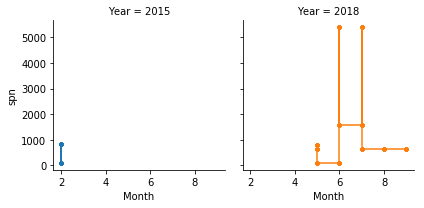

In [65]:
grid = sns.FacetGrid(truck_310, col="Year", hue="Year")
grid.map(plt.plot, "Month","spn", marker='.');

In [7]:
J1939['Month'] = pd.DatetimeIndex(J1939['EventTimeStamp']).month
#getdummies for month feature

In [15]:
J1939.head()

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,Month,Year
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,2,2015
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,...,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,2,2015
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,2,2015
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,2,2015
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,...,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,2,2015


In [11]:
J1939['Year'] = pd.DatetimeIndex(J1939['EventTimeStamp']).year

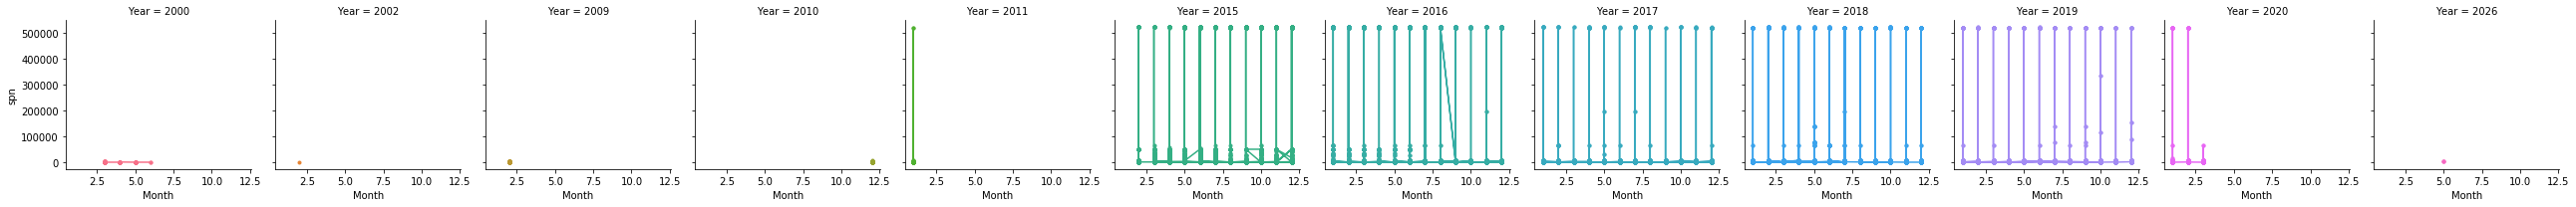

In [14]:
grid = sns.FacetGrid(J1939, col="Year", hue="Year")
grid.map(plt.plot, "Month","spn", marker='.');

In [ ]:
J1939.Year.value_counts().plt